### This data analysis notebook explores LA County Shortages of Medical Services based on 
#### 1) Medically Underserved Score,
#### 2) Zip Code
#### 3) City
#### 4) Healthcare Services Category
#### 5) Healthcare License Category
#### 6) Various Combination of above Features

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
la_facility_mua = pd.read_csv('../input/la-final-data-2/la_facility_mua.csv')
la_facility_pcua = pd.read_csv('../input/la-final-data-2/la_facility_pcua.csv')
print(la_facility_mua.shape, la_facility_pcua.shape)

(11777, 32) (9162, 40)


#### la_facility_mua dataframe represents the merged datasets of
1) LA County Community Services

2) LA County Healthcare Facilities

3) LA County Medically Underserved Areas

In [3]:
la_facility_mua.head(20)

,source,cat1,cat2,org_name,Name,addrln1,city,state,post_id,description,...,facility_address_1,MUA_RuralStatus,MUA_Designated_Time,MUA_Designated_Date,MUA_MSSA_Name_1,MUA_Updated_Time,MUA_Updated_Date,MUA_Poverty,MUA_Score,MUA_Pct_100Poverty
0,211,Social Services,Children and Family Services,neweconomicsforwomen.org,New Economics For Women - Familysource Center ...,501 S. Bixel St.,Los Angeles,CA,56652,The agency is an economic development organiza...,...,415 South Union Avenue,Urban,1.067990e+12,2003-11-05,MSSA 78.2b (Pico Union/Westlake),1.067990e+12,2003-11-05,157757.0,51.0,0.0
1,211,Social Services,Children and Family Services,neweconomicsforwomen.org,New Economics For Women - Familysource Center ...,501 S. Bixel St.,Los Angeles,CA,56652,The agency is an economic development organiza...,...,600 St Paul Ave,Urban,7.686144e+11,1994-05-11,Westlake Service Area,1.005782e+12,2001-11-15,0.0,60.1,0.0
2,211,Social Services,Children and Family Services,neweconomicsforwomen.org,New Economics For Women - Familysource Center ...,501 S. Bixel St.,Los Angeles,CA,56652,The agency is an economic development organiza...,...,1125 W 6th St,Urban,7.686144e+11,1994-05-11,Westlake Service Area,1.005782e+12,2001-11-15,0.0,60.1,0.0
3,211,Social Services,Children and Family Services,neweconomicsforwomen.org,New Economics For Women - Familysource Center ...,501 S. Bixel St.,Los Angeles,CA,56652,The agency is an economic development organiza...,...,1225 Wilshire Boulevard,Urban,7.686144e+11,1994-05-11,Westlake Service Area,1.005782e+12,2001-11-15,0.0,60.1,0.0
4,211,Social Services,Children and Family Services,neweconomicsforwomen.org,New Economics For Women - Familysource Center ...,501 S. Bixel St.,Los Angeles,CA,56652,The agency is an economic development organiza...,...,1127 Wilshire Blvd,Urban,7.686144e+11,1994-05-11,Westlake Service Area,1.005782e+12,2001-11-15,0.0,60.1,0.0
5,211,Social Services,Children and Family Services,neweconomicsforwomen.org,New Economics For Women - Familysource Center ...,501 S. Bixel St.,Los Angeles,CA,56652,The agency is an economic development organiza...,...,1212 Wilshire Blvd,Urban,7.686144e+11,1994-05-11,Westlake Service Area,1.005782e+12,2001-11-15,0.0,60.1,0.0
6,211,Social Services,Children and Family Services,neweconomicsforwomen.org,New Economics For Women - Familysource Center ...,501 S. Bixel St.,Los Angeles,CA,56652,The agency is an economic development organiza...,...,1127 Wilshire Blvd,Urban,7.686144e+11,1994-05-11,Westlake Service Area,1.005782e+12,2001-11-15,0.0,60.1,0.0
7,211,Social Services,Children and Family Services,neweconomicsforwomen.org,New Economics For Women - Familysource Center ...,501 S. Bixel St.,Los Angeles,CA,56652,The agency is an economic development organiza...,...,303 Loma Dr,Urban,7.686144e+11,1994-05-11,Westlake Service Area,1.005782e+12,2001-11-15,0.0,60.1,0.0
8,211,Social Services,Children and Family Services,neweconomicsforwomen.org,New Economics For Women - Familysource Center ...,501 S. Bixel St.,Los Angeles,CA,56652,The agency is an economic development organiza...,...,1125 W 6th St,Urban,7.686144e+11,1994-05-11,Westlake Service Area,1.005782e+12,2001-11-15,0.0,60.1,0.0
9,211,Social Services,Children and Family Services,neweconomicsforwomen.org,New Economics For Women - Familysource Center ...,501 S. Bixel St.,Los Angeles,CA,56652,The agency is an economic development organiza...,...,1666 W 3rd St,Urban,7.686144e+11,1994-05-11,Westlake Service Area,1.005782e+12,2001-11-15,0.0,60.1,0.0


In [4]:
la_facility_pcua.head(20)

,source,cat1,cat2,org_name,Name,addrln1,city,state,post_id,description,...,HPSA_Updated_Time,HPSA_PctPoverty,HPSA_Shortage,HPSA_Ratio,HPSA_CountPoverty,HPSA_Pop_100Poverty,HPSA_Pop_200Poverty,HPSA_Pct_100Poverty,HPSA_Pct_200Poverty,HPSA_UnitCount
0,211,Social Services,Children and Family Services,neweconomicsforwomen.org,New Economics For Women - Familysource Center ...,501 S. Bixel St.,Los Angeles,CA,56652,The agency is an economic development organiza...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,211,Social Services,Children and Family Services,NaN,Shields For Families Inc - Compton Family Pres...,215 Acacia Ave.,Compton,CA,621,"The agency provides child abuse services, dome...",...,1.514333e+12,22.4,24.5800,22665:1,82904.0,18583.0,43222.0,22.415083,52.135000,21.0
2,211,Social Services,Children and Family Services,NaN,Shields For Families Inc - Compton Family Pres...,215 Acacia Ave.,Compton,CA,621,"The agency provides child abuse services, dome...",...,1.514333e+12,22.4,24.5800,22665:1,82904.0,18583.0,43222.0,22.415083,52.135000,21.0
3,211,Social Services,Children and Family Services,NaN,Shields For Families Inc - Compton Family Pres...,215 Acacia Ave.,Compton,CA,621,"The agency provides child abuse services, dome...",...,1.514333e+12,29.0,21.8500,10640:1,90233.0,25368.0,56536.0,28.113883,62.655569,20.0
4,211,Social Services,Children and Family Services,NaN,Shields For Families Inc - Compton Family Pres...,215 Acacia Ave.,Compton,CA,621,"The agency provides child abuse services, dome...",...,1.514333e+12,29.0,21.8500,10640:1,90233.0,25368.0,56536.0,28.113883,62.655569,20.0
5,211,Social Services,Children and Family Services,NaN,Impacto Leadership Challenge - Junior/High Sch...,135 N. Mission Rd.,Los Angeles,CA,784,"The agency provides business services, child c...",...,1.514333e+12,41.2,22.9900,9632:1,97439.0,40927.0,71271.0,42.002689,73.144224,25.0
6,211,Social Services,Children and Family Services,NaN,Impacto Leadership Challenge - Junior/High Sch...,135 N. Mission Rd.,Los Angeles,CA,784,"The agency provides business services, child c...",...,1.514333e+12,41.2,22.9900,9632:1,97439.0,40927.0,71271.0,42.002689,73.144224,25.0
7,211,Social Services,Children and Family Services,NaN,Impacto Leadership Challenge - Junior/High Sch...,135 N. Mission Rd.,Los Angeles,CA,784,"The agency provides business services, child c...",...,1.514333e+12,41.2,22.9900,9632:1,97439.0,40927.0,71271.0,42.002689,73.144224,25.0
8,211,Social Services,Children and Family Services,NaN,Bienvenidos - Community Health Center / Woman'...,507 S. Atlantic Blvd.,Los Angeles,CA,797,"The agency provides child abuse services, fami...",...,1.513901e+12,23.8,12.8362,6895:1,117107.0,27267.0,67643.0,23.283834,57.761705,26.0
9,211,Social Services,Children and Family Services,NaN,Bienvenidos - Community Health Center / Woman'...,507 S. Atlantic Blvd.,Los Angeles,CA,797,"The agency provides child abuse services, fami...",...,1.513901e+12,23.8,12.8362,6895:1,117107.0,27267.0,67643.0,23.283834,57.761705,26.0


### 1) Data Cleaning
#### Drop Useless Columns

In [5]:
la_facility_mua.drop(['use_type','facility_number_of_beds'], axis=1, inplace=True)
la_facility_pcua.drop(['use_type','facility_number_of_beds'], axis=1, inplace=True)

#### a) Add 'cat1'+'cat2'= 'cat1+2': Combined Healthcare and Community Services
#### b) Fill in Null values with mode/median
#### c) Correct 'strange' values in 'city' variable

In [6]:
la_facility_mua['Zip Code'] = la_facility_mua['Zip Code'].astype('int32')
la_facility_pcua['Zip Code'] = la_facility_pcua['Zip Code'].astype('int32')
la_facility_mua = la_facility_mua[la_facility_mua['Zip Code']!=0]
la_facility_mua['cat1+2'] = la_facility_mua['cat2'].astype('str')+'_'+la_facility_mua['cat1'].astype('str')
la_facility_mua['license_category'].fillna('Community Clinic', inplace=True) #mode
la_facility_mua['MUA_Score'].fillna(59.8, inplace=True) #median

la_facility_mua['city'] = la_facility_mua['city'].str.replace('Signal Hill ', 'Signal Hill')
la_facility_mua['city'] = la_facility_mua['city'].str.replace(' Hollywoo', ' Hollywood').str.replace(' Hollywoodd', ' Hollywood')
la_facility_mua['city'] = la_facility_mua['city'].str.replace('Los Angeles,', 'Los Angeles').str.replace('Los Angeles ', 'Los Angeles').str.replace('Los Angelels','Los Angeles').str.replace('Los  Angeles', 'Los Angeles').str.replace(' Los Angeles', 'Los Angeles')
la_facility_mua['city'] = la_facility_mua['city'].str.replace('Industry', 'City of Industry').str.replace('City of Industry ', 'City of Industry').str.replace('City of City of Industry', 'City of Industry')
la_facility_mua['city'] = la_facility_mua['city'].str.replace('Bell', 'Bell Gardens').str.replace('Bell Gardensflower', 'Bell Gardens').str.replace('Bell Gardens Gardens', 'Bell Gardens')

In [7]:
la_facility_mua['Zip Code'].value_counts().sort_values(ascending=False).head(10)

91401    1127
91606     660
90033     646
90010     570
91405     510
90813     507
90015     420
90057     408
90806     396
91205     300
Name: Zip Code, dtype: int64

In [8]:
la_facility_mua.columns

Index(['source', 'cat1', 'cat2', 'org_name', 'Name', 'addrln1', 'city',
       'state', 'post_id', 'description', 'link', 'latitude', 'longitude',
       'date_updated', 'Zip Code', 'facility_name', 'facility_description',
       'facility_status', 'license_category', 'facility_er_service',
       'facility_address_1', 'MUA_RuralStatus', 'MUA_Designated_Time',
       'MUA_Designated_Date', 'MUA_MSSA_Name_1', 'MUA_Updated_Time',
       'MUA_Updated_Date', 'MUA_Poverty', 'MUA_Score', 'MUA_Pct_100Poverty',
       'cat1+2'],
      dtype='object')

### 2) Exploratory Data Analysis (EDA)

#### Let's look at All columns in the dataframe

#### Now, let's plot Distribution of Medically Underserved Scores

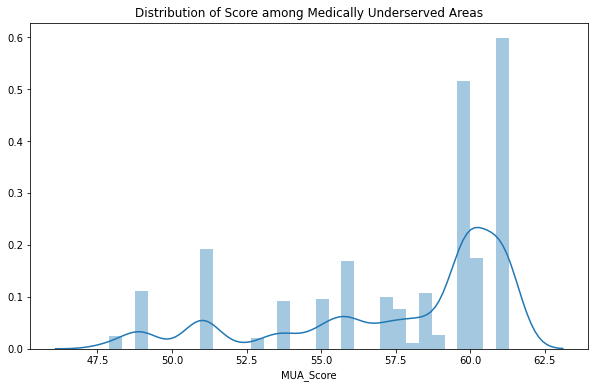

In [9]:
plt.figure(figsize = (10, 6))
sns.distplot(la_facility_mua['MUA_Score']);
plt.title('Distribution of Score among Medically Underserved Areas');

#### This graph looks at Counts in Each Score Category for Medically Underserved Areas
#### Sidenote: Medically Underserved Scores (0-100)
a) The lower the score, the higher the severity of shortages

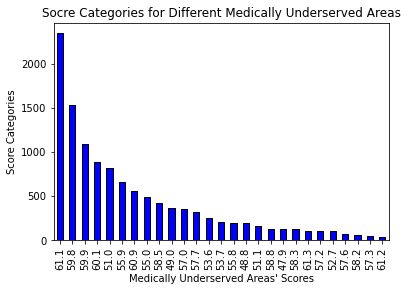

In [10]:
# Frequency Counting for Different Medically Underserved Areas Scores
la_facility_mua['MUA_Score'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Socre Categories for Different Medically Underserved Areas'); plt.xlabel("Medically Underserved Areas' Scores"); plt.ylabel('Score Categories');

#### Let's check unique values for some important Categorical Variables

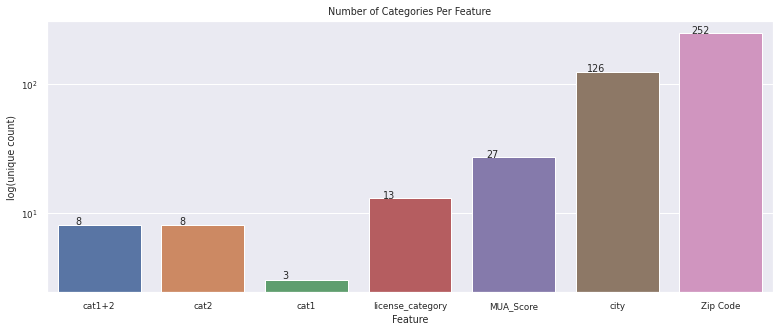

In [11]:
# Important Categorical Variables

plt.figure(figsize=(13, 5))
cols = ['cat1+2', 'cat2', 'cat1', 'license_category', 'MUA_Score', 'city', 'Zip Code']
uniques = [len(la_facility_mua[col].unique()) for col in cols]
sns.set(font_scale=0.8)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of Categories Per Feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/4.,
            height + 0.07,
            uniq,
            ha="center")

#### The graph represents Counts in Combined Healthcare and Community Services Categories

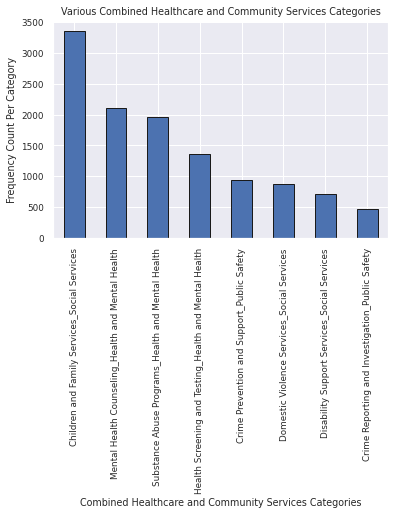

In [13]:
# Frequency Counting for cat1+2
la_facility_mua['cat1+2'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Various Combined Healthcare and Community Services Categories'); plt.xlabel('Combined Healthcare and Community Services Categories'); plt.ylabel('Frequency Count Per Category');

#### Now, let's look at Average Score for Different Medically Underserved Areas based on Combined Healthcare and Community Services

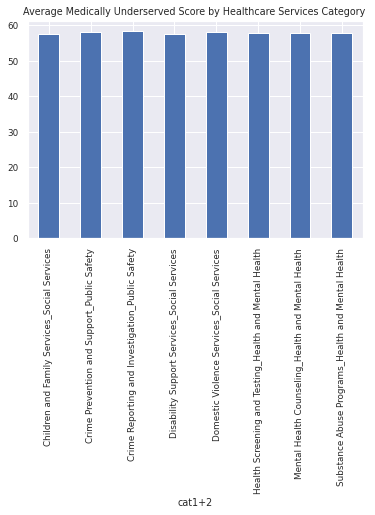

In [14]:
la_facility_mua.groupby('cat1+2')['MUA_Score'].mean().plot.bar(color = 'b');
plt.title('Average Medically Underserved Score by Healthcare Services Category ');

#### This time, we will plot Average Scores for Different Medically Underserved Areas based on Healthcare License Category

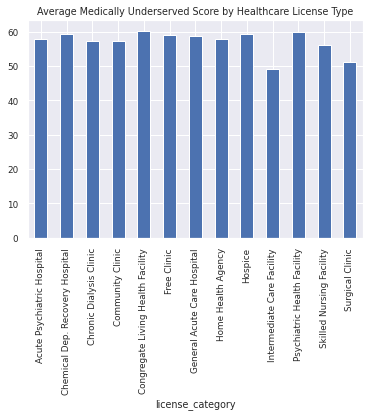

In [15]:
la_facility_mua.groupby('license_category')['MUA_Score'].mean().plot.bar(color = 'b');
plt.title('Average Medically Underserved Score by Healthcare License Type');

#### The graph displays Minimum Scores for Different Medically Underserved Areas based on Healthcare License Category
#### a) Lowest Minimum Scores
i) Chronic Dialysis Clinic, 

ii) Community Clinic, 

iii) Home Health Agency, 

iv) Hospice, 

v) Intermediate Health Facility, 

#### b) Highest Minimum Scores

i) Psychiatric Health Facility,

ii) Acute Psychiatric Hospital

iii) Chemical Dep. Recovery Hospital

iv) Congregate Living Health Facility

v) Free Clinic

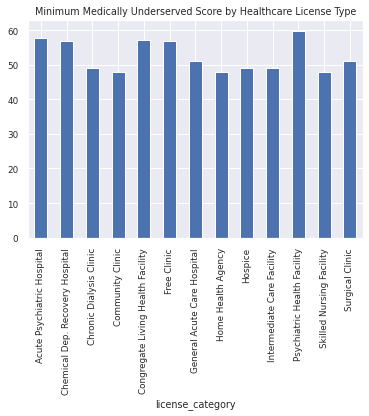

In [16]:
la_facility_mua.groupby('license_category')['MUA_Score'].min().plot.bar(color = 'b');
plt.title('Minimum Medically Underserved Score by Healthcare License Type');

### 3) Detailed Data Analysis 
(City, Zip Code, Healthcare Service Category, Medically Underserved Scores)

### a) Average Medically Underserved for Each City; Minimum Medically Underserved for Each City

In [18]:
city_score = {
    'MUA_Score': ['mean', 'min']
}
city_score = la_facility_mua.groupby('city').agg(city_score)
city_score.columns = ['ByCity_' + ('_'.join(col).strip()) for col in city_score.columns.values]
city_score.reset_index(inplace=True)

In [19]:
city_score.head(7)

,city,ByCity_MUA_Score_mean,ByCity_MUA_Score_min
0,Acton,59.8,59.8
1,Agoura Hills,59.8,59.8
2,Alhambra,59.8,59.8
3,Altadena,59.8,59.8
4,Arcadia,59.8,59.8
5,Arleta,60.4,59.8
6,Artesia,59.8,59.8


### Now, lets' look at Average Scores for 5 Most Frequent Cities

In [20]:
la_facility_mua['city'].value_counts().sort_values(ascending=False).head(5)

Los Angeles        4700
Van Nuys           1810
Long Beach         1157
North Hollywood     857
Pomona              356
Name: city, dtype: int64

In [21]:
top5City_MUAscore = city_score[(city_score['city']=='Los Angeles') | 
                               (city_score['city']=='Van Nuys') | 
                               (city_score['city']=='Long Beach') | 
                               (city_score['city']=='North Hollywood') | 
                               (city_score['city']=='Pomona')]

### Among 5 most frequent cities:
#### 1) LA City has lowest Average and Minimum Underserved Scores (55.238234)
#### 2) LA City has highest serverity of shortages
#### 3) Van Nuys has highest Average and Minimum Underserved Scores (61.100000)
#### 4) Van Nuys has lowest shortage problem

In [22]:
top5City_MUAscore

,city,ByCity_MUA_Score_mean,ByCity_MUA_Score_min
63,Long Beach,59.827312,48.8
64,Los Angeles,55.238234,47.9
74,North Hollywood,57.205368,55.9
84,Pomona,57.015730,57.0
115,Van Nuys,61.100000,61.1


### b) Combined Healthcare and Community Services Category by Each City

In [23]:
city_servicestype = {
    'cat1+2': ['count'],
}
city_servicestype = la_facility_mua.groupby('city').agg(city_servicestype)
city_servicestype.columns = ['ByCity_' + ('_'.join(col).strip()) for col in city_servicestype.columns.values]
city_servicestype.reset_index(inplace=True)

In [24]:
city_servicestype.head(7)

,city,ByCity_cat1+2_count
0,Acton,1
1,Agoura Hills,1
2,Alhambra,14
3,Altadena,5
4,Arcadia,12
5,Arleta,5
6,Artesia,1


### c) Average Medically Underserved Scores by (Each City + Available Healthcare & Community Services Category)

In [25]:
city_services_score = {
    'MUA_Score': ['mean', 'count'],
}
city_services_score = la_facility_mua.groupby(['city', 'cat2']).agg(city_services_score)
city_services_score.columns = ['ByCity+HealthcareServices_' + ('_'.join(col).strip()) for col in city_services_score.columns.values]
city_services_score.reset_index(inplace=True)

In [26]:
city_services_score.head(7)

,city,cat2,ByCity+HealthcareServices_MUA_Score_mean,ByCity+HealthcareServices_MUA_Score_count
0,Acton,Substance Abuse Programs,59.8,1
1,Agoura Hills,Domestic Violence Services,59.8,1
2,Alhambra,Children and Family Services,59.8,5
3,Alhambra,Crime Prevention and Support,59.8,1
4,Alhambra,Disability Support Services,59.8,4
5,Alhambra,Health Screening and Testing,59.8,3
6,Alhambra,Substance Abuse Programs,59.8,1


In [27]:
LACity_AvgMUAScore_byServicesCategory = city_services_score[city_services_score['city']=='Los Angeles']

### Among all Healthcare & Community Services in LA City,
#### 1) Top 2 Lowest Avg Scores (= Highest Shortage Severity)
a) Crime Prevention and Support (54.889607)

b) Disability Support Services (55.025606)

#### 2) Top 2 Highest Avg Scores (= Lowest Shortage Severity)
a) Domestic Violence Services (56.030897)

b) Health Screening and Testing (55.545638)

In [28]:
LACity_AvgMUAScore_byServicesCategory

,city,cat2,ByCity+HealthcareServices_MUA_Score_mean,ByCity+HealthcareServices_MUA_Score_count
244,Los Angeles,Children and Family Services,55.168163,1448
245,Los Angeles,Crime Prevention and Support,54.889607,356
246,Los Angeles,Crime Reporting and Investigation,55.403571,168
247,Los Angeles,Disability Support Services,55.025606,289
248,Los Angeles,Domestic Violence Services,56.030897,301
249,Los Angeles,Health Screening and Testing,55.545638,596
250,Los Angeles,Mental Health Counseling,55.063484,775
251,Los Angeles,Substance Abuse Programs,55.202868,767


### d) Average Underserved Scores by (Each City + Zip Code)

In [29]:
city_zip_score = {
    'MUA_Score': ['mean', 'count'],
}
city_zip_score = la_facility_mua.groupby(['city', 'Zip Code']).agg(city_zip_score)
city_zip_score.columns = ['ByZipCode_' + ('_'.join(col).strip()) for col in city_zip_score.columns.values]
city_zip_score.reset_index(inplace=True)

In [30]:
city_zip_score.head(7)

,city,Zip Code,ByZipCode_MUA_Score_mean,ByZipCode_MUA_Score_count
0,Acton,93510,59.8,1
1,Agoura Hills,91301,59.8,1
2,Alhambra,91801,59.8,10
3,Alhambra,91802,59.8,1
4,Alhambra,91803,59.8,3
5,Altadena,91001,59.8,5
6,Arcadia,91006,59.8,7


In [31]:
LACity_MUAScore_byZipCode = city_zip_score[city_zip_score['city']=='Los Angeles']

In [32]:
LACity_MUAScore_byZipCode

,city,Zip Code,ByZipCode_MUA_Score_mean,ByZipCode_MUA_Score_count
124,Los Angeles,90001,48.90,24
125,Los Angeles,90002,51.10,34
126,Los Angeles,90003,53.70,56
127,Los Angeles,90004,60.10,12
128,Los Angeles,90005,51.00,15
...,...,...,...,...
185,Los Angeles,90073,59.80,6
186,Los Angeles,90089,57.25,2
187,Los Angeles,90211,59.80,1
188,Los Angeles,90230,59.80,1


### e) Average Medically Underserved Scores by Zip Code

In [33]:
zip_score = {
    'MUA_Score': ['mean', 'count'],
}
zip_score = la_facility_mua.groupby(['Zip Code']).agg(zip_score)
zip_score.columns = ['ByZipCode_' + ('_'.join(col).strip()) for col in zip_score.columns.values]
zip_score.reset_index(inplace=True)

In [34]:
zip_score.head(7)

,Zip Code,ByZipCode_MUA_Score_mean,ByZipCode_MUA_Score_count
0,90001,48.90,26
1,90002,51.10,34
2,90003,53.70,56
3,90004,60.10,12
4,90005,51.00,15
5,90006,51.00,108
6,90007,52.95,120


### Now let's look at 10 Most Frequent Zip Code Areas

In [35]:
la_facility_mua['Zip Code'].value_counts().sort_values(ascending=False).head(10)

91401    1127
91606     660
90033     646
90010     570
91405     510
90813     507
90015     420
90057     408
90806     396
91205     300
Name: Zip Code, dtype: int64

In [36]:
top10_ZipAreas_MUAScore = zip_score[(zip_score['Zip Code']==91401) | (zip_score['Zip Code']==91606) | 
                                   (zip_score['Zip Code']==90033) | (zip_score['Zip Code']==90010) | 
                                   (zip_score['Zip Code']==91405) | (zip_score['Zip Code']==90813) |
                                   (zip_score['Zip Code']==90015) | (zip_score['Zip Code']==90057) |
                                   (zip_score['Zip Code']==90806) | (zip_score['Zip Code']==91205) ]

### Among 10 most frequent Zip Code Areas
#### 1) Lowest Average Score (=Highest Shortage Severity)
a) 90015 (53.833333)

b) 90010 (53.873684)

c) 90057 (56.352941)

#### 2) Highest Average Score (=Lowest Shortage Problem)

a) 91401 (61.100000)

b) 91405 (61.100000)

c) 90806 (59.900000)

In [37]:
top10_ZipAreas_MUAScore

,Zip Code,ByZipCode_MUA_Score_mean,ByZipCode_MUA_Score_count
8,90010,53.873684,570
13,90015,53.833333,420
30,90033,57.241176,646
49,90057,56.352941,408
141,90806,59.900000,396
145,90813,59.792308,507
167,91205,58.500000,300
197,91401,61.100000,1127
200,91405,61.100000,510
213,91606,57.200000,660


### f) Average Medically Underserved Scores by (Zip Code + Available Healthcare Community Services)

In [38]:
zip_services_score = {
    'MUA_Score': ['mean', 'count'],
}
zip_services_score = la_facility_mua.groupby(['Zip Code', 'cat2']).agg(zip_services_score)
zip_services_score.columns = ['ByZipCode+HealthcareServices_' + ('_'.join(col).strip()) for col in zip_services_score.columns.values]
zip_services_score.reset_index(inplace=True)

In [39]:
zip_services_score.head(7)

,Zip Code,cat2,ByZipCode+HealthcareServices_MUA_Score_mean,ByZipCode+HealthcareServices_MUA_Score_count
0,90001,Children and Family Services,48.9,6
1,90001,Crime Prevention and Support,48.9,6
2,90001,Crime Reporting and Investigation,48.9,2
3,90001,Domestic Violence Services,48.9,2
4,90001,Mental Health Counseling,48.9,6
5,90001,Substance Abuse Programs,48.9,4
6,90002,Children and Family Services,51.1,10


In [40]:
top5_ZipAreas_MUAScore_byServicesType = zip_services_score[(zip_services_score['Zip Code']==91401) | 
                                                            (zip_services_score['Zip Code']==91606) | 
                                                            (zip_services_score['Zip Code']==90033) | 
                                                            (zip_services_score['Zip Code']==90010) | 
                                                            (zip_services_score['Zip Code']==91405) ]

### For available healthcare services category, among 5 most frequent zip code areas:
#### 1) Lowest Average Score (=Highest Shortage Severity)
a) 90010 (53.873684)

b) 91606 (57.200000)

#### 2) Highest Average Score (=Lowest Shortage Problem)
a) 91401 (61.100000)
 
b) 91405 (61.100000)

In [41]:
top5_ZipAreas_MUAScore_byServicesType

,Zip Code,cat2,ByZipCode+HealthcareServices_MUA_Score_mean,ByZipCode+HealthcareServices_MUA_Score_count
47,90010,Children and Family Services,53.873684,209
48,90010,Crime Prevention and Support,53.873684,38
49,90010,Disability Support Services,53.873684,95
50,90010,Domestic Violence Services,53.873684,38
51,90010,Health Screening and Testing,53.873684,19
52,90010,Mental Health Counseling,53.873684,76
53,90010,Substance Abuse Programs,53.873684,95
181,90033,Children and Family Services,57.241176,187
182,90033,Crime Prevention and Support,57.241176,68
183,90033,Crime Reporting and Investigation,57.241176,34


### g) Average Underserved Score by (Zip Code + Each License Category)

In [42]:
zip_license_score = {
    'MUA_Score': ['mean', 'count'],
}
zip_license_score = la_facility_mua.groupby(['Zip Code', 'license_category']).agg(zip_license_score)
zip_license_score.columns = ['ByZipCode+HealthcareLicenseType_' + ('_'.join(col).strip()) for col in zip_license_score.columns.values]
zip_license_score.reset_index(inplace=True)

In [43]:
zip_license_score.head(7)

,Zip Code,license_category,ByZipCode+HealthcareLicenseType_MUA_Score_mean,ByZipCode+HealthcareLicenseType_MUA_Score_count
0,90001,Community Clinic,48.9,26
1,90002,Community Clinic,51.1,34
2,90003,Community Clinic,53.7,56
3,90004,Community Clinic,60.1,12
4,90005,Home Health Agency,51.0,15
5,90006,Community Clinic,51.0,27
6,90006,Home Health Agency,51.0,27


In [44]:
top5_ZipAreas_MUAScore_byLicenseType = zip_license_score[(zip_license_score['Zip Code']==91401) | 
                                                          (zip_license_score['Zip Code']==91606) | 
                                                          (zip_license_score['Zip Code']==90033) | 
                                                          (zip_license_score['Zip Code']==90010) | 
                                                          (zip_license_score['Zip Code']==91405) ]

### For each license category, among 5 most frequent zip code areas:
#### 1) Lowest Average Score (=Highest Shortage Severity)
a) 90033 (49.000000 - Intermediate Care Facility)

b) 90010 (53.426667 - Home Health Agency)

c) 90033 (54.900000 - Skilled Nursing Facility)

#### 2) Highest Average Score (=Lowest Shortage Problem)
a) 91401 (61.100000 - same score for all license types)

b) 91405 (61.100000 - same score for all license types)

In [45]:
top5_ZipAreas_MUAScore_byLicenseType

,Zip Code,license_category,ByZipCode+HealthcareLicenseType_MUA_Score_mean,ByZipCode+HealthcareLicenseType_MUA_Score_count
11,90010,Community Clinic,55.550000,60
12,90010,Home Health Agency,53.426667,450
13,90010,Hospice,55.550000,60
57,90033,Chronic Dialysis Clinic,58.350000,76
58,90033,Community Clinic,57.742857,266
59,90033,General Acute Care Hospital,59.200000,114
60,90033,Home Health Agency,60.900000,38
61,90033,Intermediate Care Facility,49.000000,38
62,90033,Skilled Nursing Facility,54.900000,114
294,91401,Community Clinic,61.100000,23


### From all of the above Analysis, 
#### 1) Medical Underserved Level is the lowest in 91401 and 91405
#### 2) Medical Underserved Level is the highest in 90010, 90015 and 90333
#### 3) LA City has Highest Shrotages in Crime prevention and Disability Support Services
#### 4) LA City has Lowest Shortages in Health Screening, Testing and Domestic Violence Support Services